# 勾配ブースティング回帰木

Accuracy on training set: 0.991
Accuracy on test set: 0.972


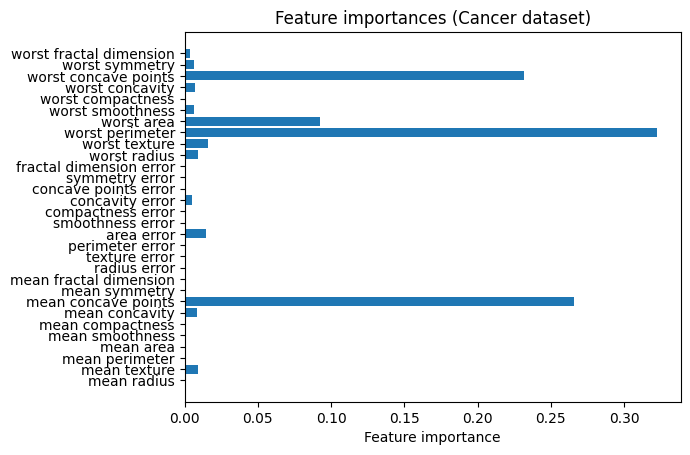

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import utils

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

grbt = GradientBoostingClassifier(random_state=0, max_depth=1)
grbt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(grbt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grbt.score(X_test, y_test)))
utils.plot_feature_importances_cancer(grbt, cancer)

## 勾配ブースティング回帰木 (Gradient Boosting Regression Trees, GBRT)

### 基本の考え方
- **弱学習器（通常は浅い決定木）** を多数組み合わせて強力な予測モデルを作る手法。
- ランダムフォレストは「木を並列に学習して平均化」するが、  
  勾配ブースティングは「木を逐次的に学習して誤差を修正」していく。
- 誤差を **勾配降下法** の発想で少しずつ減らしていく。

---

### アルゴリズムの流れ（回帰の場合）

1. **初期モデルの構築**  
   まず定数モデル（例: 平均値）を予測モデルとして置く。

   $$
   F_0(x) = \arg\min_c \sum_{i=1}^n L(y_i, c)
   $$

   （平方誤差の場合は平均値）

---

2. **残差（負の勾配）の計算**  
   目的関数の勾配に相当する値を計算する。  
   平方誤差の場合は単純に残差になる。

   $$
   r_{im} = y_i - F_{m-1}(x_i)
   $$

---

3. **決定木を学習**  
   残差 $r_{im}$ を予測する回帰木 $h_m(x)$ を学習する。

---

4. **モデルの更新**  
   学習率 $\nu$ を使い、前のモデルに新しい木を足す。

   $$
   F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x)
   $$

---

5. **繰り返す**  
   $M$ 回繰り返すことで誤差を徐々に減らしていく。

---

### 特徴
- **高い予測精度**（単純な決定木より圧倒的によい）。
- **ハイパーパラメータが多い**（木の深さ、木の数、学習率など）。
- **学習コストは重め**（逐次処理なのでランダムフォレストより遅い）。

---

### 実装例（scikit-learn）
```python
from sklearn.ensemble import GradientBoostingRegressor

# モデル定義
gbrt = GradientBoostingRegressor(
    n_estimators=100,   # 木の数
    learning_rate=0.1,  # 学習率
    max_depth=3,        # 各木の深さ
    random_state=42
)

# 学習
gbrt.fit(X_train, y_train)

# 予測
y_pred = gbrt.predict(X_test)
```

### 代表的なライブラリ
- scikit-learn: GradientBoostingRegressor
- XGBoost, LightGBM, CatBoost など（高速で改良版の実装）